# Logistic Regression

## Linear Regression Review


$y = \beta_0 + \beta_1X_1 + ... + \beta_nX_n$

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=5)
df = pd.DataFrame(data=X)
df.columns = ['x1', 'x2', 'x3', 'x4', 'x5']
df['y'] = y
print(df.head())
df.describe()

         x1        x2        x3        x4        x5           y
0  1.796004 -0.244652  0.657822 -0.103979  0.214390  197.208861
1 -1.086812 -0.444955 -1.450538  0.562638 -0.102427 -150.713633
2  0.959988  1.849409  1.598702 -0.945212  0.227278  133.849201
3  0.458813 -1.910318 -0.715464  1.722429  0.033708  133.298814
4  1.757517 -0.383854 -0.293895  1.727209 -0.853108  191.398191


,x1,x2,x3,x4,x5,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.013542,-0.006065,-0.020402,-0.017844,0.018806,-0.328668
std,0.968533,0.982815,0.983748,0.968562,1.005675,172.147916
min,-3.328911,-3.532877,-2.660831,-3.052230,-2.729183,-492.402207
25%,-0.622896,-0.684911,-0.661850,-0.682803,-0.662060,-119.221042
50%,0.012580,-0.000915,-0.045584,0.000186,0.042087,-1.733974
75%,0.662652,0.625220,0.634073,0.648692,0.674581,121.261788
max,3.182635,3.440037,3.087405,2.994076,3.633502,587.702845


## Simple Linear Regression

          x          y
0  0.074011   2.803995
1 -1.011085 -48.805477
2  0.683727  54.348082
3  0.382338  26.663093
4 -1.129127 -62.257658

 Dataframe after scaling
          x         y
0  0.377758  0.331632
1 -0.781449 -0.527449
2  1.029118  1.189624
3  0.707144  0.728785
4 -0.907552 -0.751371

x, y scatter plot with line of best fit as per our line equation
y = -0.04327650267858249 + 0.940839972851991X


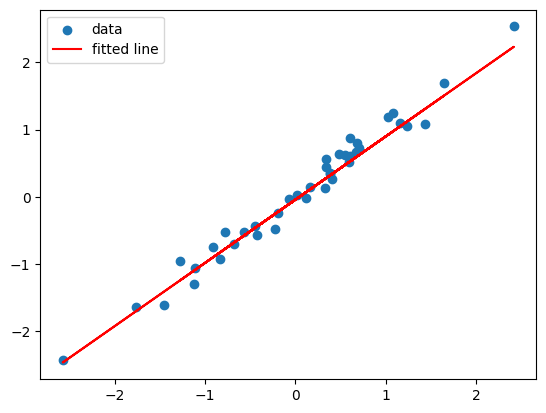

In [ ]:
# create and train the model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_regression(n_samples=50, n_features=1, noise=10)
df = pd.DataFrame(data=X, columns=['x'])
df['y'] = y
print(df.head())

scaler = StandardScaler()
df[['x', 'y']] = scaler.fit_transform(df[['x', 'y']])
print('\n Dataframe after scaling')
print(df.head())

# decision threshold = .5
df['class'] = df['y'].apply(lambda x: 0 if x <= 0 else 1)

X_train, X_test, y_train, y_test = train_test_split(df.drop(['y'], axis=1), df['y'], test_size=.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# test set prediction results
predictions = model.predict(X_test)
print('\nx, y scatter plot with line of best fit as per our line equation')
print(f'y = {model.intercept_} + {model.coef_[0]}X')

plt.scatter(X_train['x'], y_train, label='data')
plt.plot(X_train['x'], model.intercept_ + model.coef_[0] * X_train['x'], color='red', label='fitted line')
# plt.axhline(0.5, color='green', linestyle='dashed', label='threshold')
plt.legend();

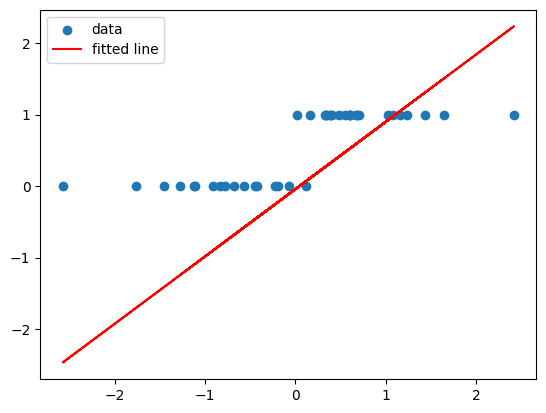

In [ ]:
# does a line of best fit over a binary dependent variable make sense?
plt.scatter(X_train['x'], X_train['class'], label='data')
plt.plot(X_train['x'], model.intercept_ + model.coef_[0] * X_train['x'], color='red', label='fitted line')
plt.legend();

# Logistic Regression

### The Sigmoid

Sigmoid curves are common in statistics as cumulative distribution functions (which go from 0 to 1), such as the integrals of the logistic density, the normal density, and Student's t probability density functions. The logistic sigmoid function is invertible, and its inverse is the logit function.

https://en.wikipedia.org/wiki/Sigmoid_function

Sigmoidal growth is a modification of exponential growth in which the percent change gets smaller as the population approaches the carrying capacity.

http://matcmath.org/textbooks/quantitativereasoning/sigmoidal-growth/

### What is this Thing Called Threshold?

Logistic regression returns a probability. You can use the returned probability "as is" (for example, the probability that the user will click on this ad is 0.00023) or convert the returned probability to a binary value (for example, this email is spam).

A logistic regression model that returns 0.9995 for a particular email message is predicting that it is very likely to be spam. Conversely, another email message with a prediction score of 0.0003 on that same logistic regression model is very likely not spam. However, what about an email message with a prediction score of 0.6? In order to map a logistic regression value to a binary category, you must define a classification threshold (also called the decision threshold). A value above that threshold indicates "spam"; a value below indicates "not spam." It is tempting to assume that the classification threshold should always be 0.5, but thresholds are problem-dependent, and are therefore values that you must tune.

https://developers.google.com/machine-learning/crash-course/classification/thresholding

          x  class
0  0.377758      1
1 -0.781449      0
2  1.029118      1
3  0.707144      1
4 -0.907552      0

An S curve that is bound by 1 and 0


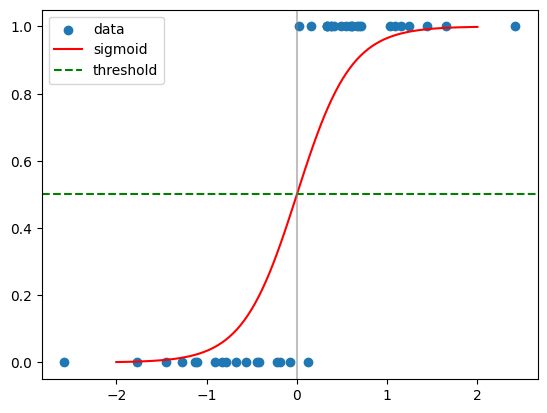

In [ ]:
# what we'd really like
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# df with x and class
print(df.drop('y', axis=1).head())

x = np.linspace(-2, 2, 100)
s = .3 # scale parameter
print('\nAn S curve that is bound by 1 and 0')
plt.scatter(X_train['x'], X_train['class'], label='data')
plt.plot(x, 1 / (1 + np.exp(-(np.mean(x)/s + (1/s)*x))), color='red', label='sigmoid')
plt.axhline(.5, color='green', linestyle='dashed', label='threshold')
plt.axvline(0, color='gray', alpha=0.5)
plt.legend()
plt.show()

### Probability

Probability = observed outcomes / possible outcomes

A naive idea (not what we actually use) would be:

$P(y=1) \approx \beta_0 + \beta_1 X$

But this can produce values below 0 or above 1, which is not valid for probabilities. With binary classification we want to show a better relationship with x.
This motivates transforming the problem using odds and then log-odds (logit).


**Review our line of best fit given x and y**


x, y scatter plot with line of best fit as per our line equation
y = -0.04327650267858249 + 0.940839972851991X


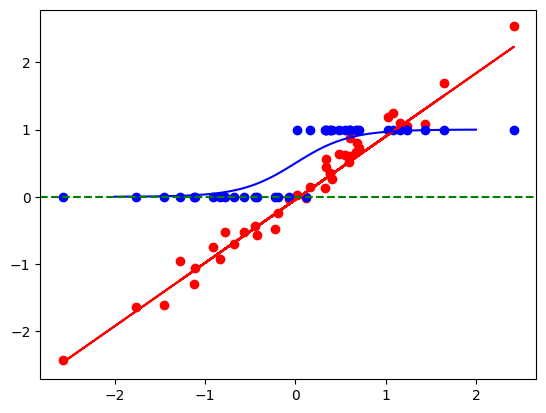

In [ ]:
print('\nx, y scatter plot with line of best fit as per our line equation')
print(f'y = {model.intercept_} + {model.coef_[0]}X')

plt.scatter(X_train['x'], y_train, label='data', color='red')
plt.plot(X_train['x'], model.intercept_ + model.coef_[0] * X_train['x'], color='red', label='fitted line')

plt.scatter(X_train['x'], X_train['class'], label='class', color='blue')
plt.plot(x, 1 / (1 + np.exp(-(np.mean(x)/s + (1/s)*x))), label='sigmoid', color='blue')

plt.axhline(0, color='green', linestyle='dashed')
plt.show()

How do we bind this line to fit a binary outcome?

### Odds

What happened/ what didn't happen - https://www.graphpad.com/support/faq/probability-vs-odds/

$\large{\frac{p}{1 - p}} = \beta_0 + \beta_1 X$

Odds are positive so we have a range of 0, $+ \infty$ so we use log

In [ ]:
# https://www.statisticshowto.com/log-odds/
import pandas as pd
import math

print('Defining odds based on a probability represented by a decimals')
d = {'Probs': [.1, .2, .3, .4, .5, .6, .7, .8, .9]}
probs = pd.DataFrame(d)
probs['Odds'] = probs['Probs']/(1 - probs['Probs'])
probs.head(9)

Defining odds based on a probability represented by a decimals


,Probs,Odds
0,0.1,0.111111
1,0.2,0.250000
2,0.3,0.428571
3,0.4,0.666667
4,0.5,1.000000
5,0.6,1.500000
6,0.7,2.333333
7,0.8,4.000000
8,0.9,9.000000


### Log Odds

We use the log of odds so that we can get to $(-\infty, +\infty)$

$\large{log(\frac{p}{1 - p}}) = \beta_0 + \beta_1 X$

Now our range is unrestricted $- \infty, + \infty$ where the odds for and odds against meet at 0 with potential symmetrical range 0 to infinity. See images at https://towardsdatascience.com/https-towardsdatascience-com-what-and-why-of-log-odds-64ba988bf704

In binomial logistic regression, the dependent variable takes only two values, which can be coded 0 and 1. So, it can't be that $Y=b0+b1X$ because that could result in any value. The logit transformation solves this problem.

We take the odds to make the value continuous. We take the odds ratio to get a parameter estimate and we take the log of that ratio to make the variable range from negative infinity to infinity and be symmetric around 0 instead of 1.

Peter Flom (https://stats.stackexchange.com/users/686/peter-flom), Why $\log(\frac{p}{1-p}) = b_0+b_1x $ in Logistic regression, URL (version: 2017-09-25): https://stats.stackexchange.com/q/304844

In [ ]:
# log odds example
import math

p = .2
odds = p/(1-p)
print('.2/.8 =', odds)
print('log(.25) =', math.log(odds))

.2/.8 = 0.25
log(.25) = -1.3862943611198906


In [ ]:
# add log odds to our probs dataframe
probs['Log Odds'] = probs['Odds'].apply(lambda x: math.log(x))
probs.head(9)

,Probs,Odds,Log Odds
0,0.1,0.111111,-2.197225
1,0.2,0.250000,-1.386294
2,0.3,0.428571,-0.847298
3,0.4,0.666667,-0.405465
4,0.5,1.000000,0.000000
5,0.6,1.500000,0.405465
6,0.7,2.333333,0.847298
7,0.8,4.000000,1.386294
8,0.9,9.000000,2.197225


### Logistic Function Proof

* $p(y=1) = \beta_0 + \beta_1x$
* $\frac{p}{1 - p} = \beta_0 + \beta_1x$ # bounded by 0
* $log(\frac{p}{1 - p}) = \beta_0 + \beta_1x$ # what we want because it is unbounded
* $e^{ln[\frac{p}{1-p}]} = e^{\beta_0 + \beta_1x}$
* $\frac{p}{1-p} = e^{\beta_0 + \beta_1x}$
* $p = e^{\beta_0 + \beta_1x} - pe^{\beta_0 + \beta_1x}$
* $= p[\frac{e^{\beta_0 + \beta_1x}}{p} - e^{\beta_0 + \beta_1x}]$
* $p[1 + e^{\beta_0 + \beta_1x}] = e^{\beta_0 + \beta_1x}$
* $= \frac{e^{\beta_0 + \beta_1x}}{1 + e^{\beta_0 + \beta_1x}}$
* $= \large{\frac{1}{1 + e^{-(\beta_0 + \beta_1x + ...)}}}$
* $= \large{\frac{1}{1 + e^{-(x)}}}$

### Why the Exponential

Exponentials are also used to express growth which is instrumental with the sigmoid function. The function $y = e^x$ gives a curve at which the slope at any value x is also the value of y, which means the derivative is equal to the function itself, or $f'(x) = e^x$ and $f(x) = e^x$.

https://www.ml-science.com/eulers-number

### Summary

Logistic functions are used in logistic regression to model how the probability $p$ of an event may be affected by one or more explanatory variables: an example would be to have the model $p = f(a + bx)$, where $x$ is the explanatory variable, $a$ and $b$ are model parameters to be fitted, and $f$ is the standard logistic function.

https://en.wikipedia.org/wiki/Logistic_function#In_statistics_and_machine_learning

* $f(x) = \large{\frac{1}{1 + e^{-(x)}}}$

https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/

# Example

In [ ]:
# Create dataset
import pandas as pd
from sklearn.datasets import make_classification

n = 1000 # number of observations
f = 2 # number of features
inform = 2 # number of meaningful features

# unpack X and y
features, binary_class = make_classification(n_samples=n, n_features=f,
                                             n_informative=inform, n_redundant=0,
                                             n_clusters_per_class=1, random_state=42)

# Create a dataframe of the features and add the binary class (label, output)
df = pd.DataFrame(features)
df.columns = ['Feature_1', 'Feature_2']
df['Class'] = binary_class
df.head()

,Feature_1,Feature_2,Class
0,0.601034,1.535353,1
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,0.753178,0.787514,1


$p(y=1) = \beta_0 + \beta_1x_1 + \beta_2x_2$

or

$\pi(x) = \sigma(\beta_0 + \beta_1x_1 + \beta_2x_2)$

## Logistic Model

In statistics, the logistic model (or logit model) is a statistical model that models the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (the coefficients in the linear combination).

* $p = \large{\frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}}$

* https://en.wikipedia.org/wiki/Logistic_regression
* https://en.m.wikipedia.org/wiki/Logistic_function

In [ ]:
# get our parameters
from statsmodels.formula.api import logit

model = logit(formula='Class ~ Feature_1 + Feature_2', data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.242088
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Thu, 10 Oct 2024   Pseudo R-squ.:                  0.6507
Time:                        21:53:44   Log-Likelihood:                -242.09
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                1.283e-196
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1197      0.365      3.070      0.002       0.405       1.834
Feature_1     -0.4561      0.171     -2.673      0.008      -0.790      -0.122
Feature_2      3.4780      0.237     14.649      0.000       3.013       3.943
==============================================================================
"""

In [ ]:
import numpy as np

print(model.params)

def linear_function(row):
    b0 = model.params.Intercept
    b1 = model.params.Feature_1
    b2 = model.params.Feature_2

    x1 = row['Feature_1']
    x2 = row['Feature_2']

    return b0 + (b1 * x1) + (b2 * x2)

def logistic_function(row):
    b0 = model.params.Intercept
    b1 = model.params.Feature_1
    b2 = model.params.Feature_2

    x1 = row['Feature_1']
    x2 = row['Feature_2']

    return 1 / (1 + np.exp(-(b0+(b1*x1)+(b2*x2))))

df['y'] = df.apply(linear_function, axis=1)
df['p(y=1)'] = df.apply(logistic_function, axis=1)
df['Predicted Class'] =  df['p(y=1)'].apply(lambda x: 0 if x < .5 else 1)
df['Odds'] = df['p(y=1)']/(1 - df['p(y=1)'])
df['Log Odds'] = df['Odds'].apply(lambda x: math.log(x))
df.head()

Intercept    1.119669
Feature_1   -0.456101
Feature_2    3.478029
dtype: float64


,Feature_1,Feature_2,Class,y,p(y=1),Predicted Class,Odds,Log Odds
0,0.601034,1.535353,1,6.185537,0.997945,1,485.673902,6.185537
1,0.755945,-1.172352,0,-3.302593,0.035482,0,0.036788,-3.302593
2,1.354479,-0.948528,0,-2.797120,0.057480,0,0.060985,-2.797120
3,3.103090,0.233485,0,0.516414,0.626309,1,1.676007,0.516414
4,0.753178,0.787514,1,3.515141,0.971116,1,33.620678,3.515141


## Threshold

Logistic regression returns a probability. You can use the returned probability "as is" (for example, the probability that the user will click on this ad is 0.00023) or convert the returned probability to a binary value (for example, this email is spam).

A logistic regression model that returns 0.9995 for a particular email message is predicting that it is very likely to be spam. Conversely, another email message with a prediction score of 0.0003 on that same logistic regression model is very likely not spam. However, what about an email message with a prediction score of 0.6? In order to map a logistic regression value to a binary category, you must define a classification threshold (also called the decision threshold). A value above that threshold indicates "spam"; a value below indicates "not spam." It is tempting to assume that the classification threshold should always be 0.5, but thresholds are problem-dependent, and are therefore values that you must tune.

https://developers.google.com/machine-learning/crash-course/classification/thresholding

## Logit

A Logit function, the inverse of the logistic sigmoid, also known as the log-odds function, is a function that represents probability values from 0 to 1, and negative infinity to infinity.

* https://deepai.org/machine-learning-glossary-and-terms/logit
* https://en.m.wikipedia.org/wiki/Logit

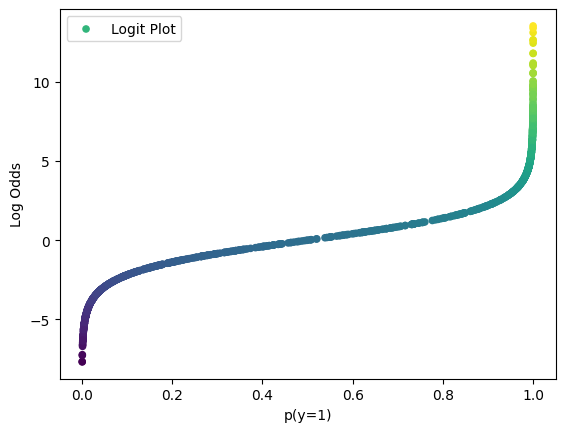

In [ ]:
# logit curve
import matplotlib.pyplot as plt

df.plot.scatter(x='p(y=1)', y='Log Odds', label='Logit Plot', c=df['Log Odds'])
plt.show()

## Logit vs Sigmoid

The inverse of the logit curve is the inverse-logit or sigmoid function. The sigmoid function transforms the numbers ( -∞ to +∞ ) back to values between 0 and 1.

* https://ajaytech.co/python-logistic-regression/

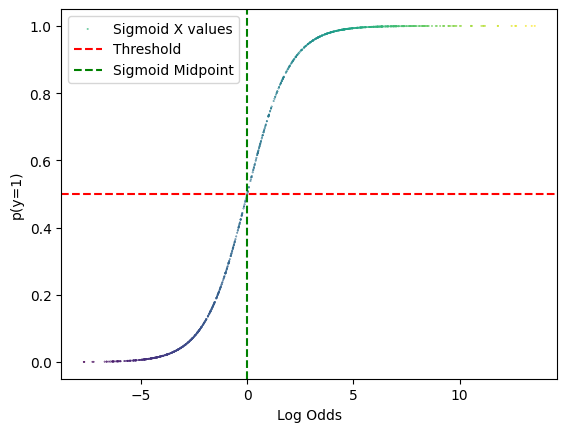

In [ ]:
import matplotlib.pyplot as plt

df.plot.scatter(x='Log Odds', y='p(y=1)', marker='.', s=.5, label='Sigmoid X values', c=df['Log Odds'])
plt.axhline(y=.5, color='red', linestyle='dashed', label='Threshold')
plt.axvline(x=0, color='green', linestyle='dashed', label='Sigmoid Midpoint')
plt.legend()
plt.show()

* Logistic regression algorithm: $f(x) = \large{\frac{1}{1 + e^{-x}}}$
* x = $\beta_0 + \beta_1X_1 + \beta_2X_2$
* If $x > 0$ then $\frac{1}{1 + e^{-x}} > .5$
* If $x < 0$ then $\frac{1}{1 + e^{-x}} < .5$